In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
matches =  pd.read_csv('/content/matches.csv')


In [41]:
matches.shape

(32, 18)

In [42]:
matches.head(8)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,NaN,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,NaN,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,NaN,6.0,Group


In [43]:
matches.describe()

,match_number,winner_runs,winner_wickets
count,32.000000,16.000000,16.000000
mean,16.500000,121.250000,6.375000
std,9.380832,74.981331,1.962142
min,1.000000,5.000000,1.000000
25%,8.750000,78.000000,5.750000
50%,16.500000,101.000000,7.000000
75%,24.250000,149.000000,8.000000
max,32.000000,309.000000,9.000000


Toss Decisions by a team

Text(0.5, 1.0, 'Toss Decision by Teams')

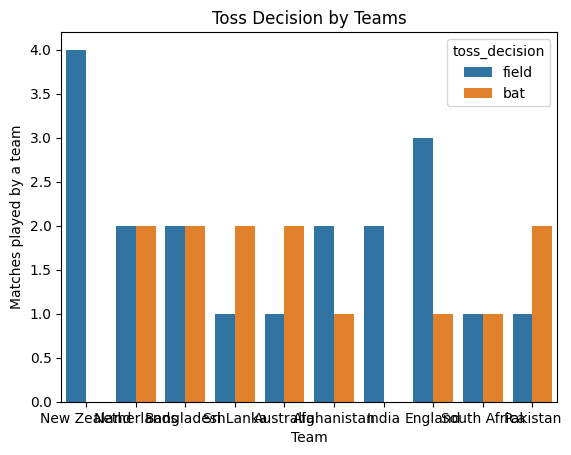

In [44]:
sns.countplot(x='toss_winner', hue='toss_decision', data=matches)
plt.xlabel('Team')
plt.ylabel('Matches played by a team')
plt.title('Toss Decision by Teams')


This graph gives the inference about the approach of the team after winning the toss

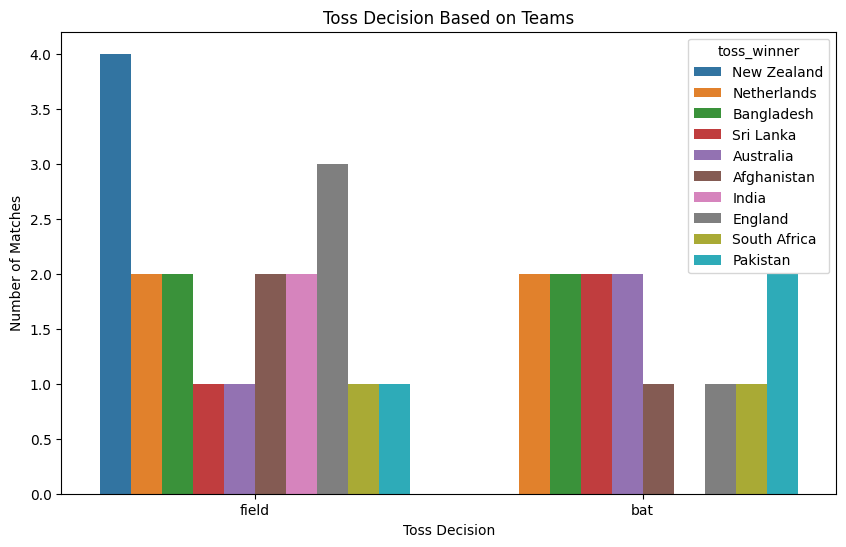

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', hue='toss_winner', data=matches)
plt.title('Toss Decision Based on Teams')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.show()

In [46]:
decision = matches['toss_decision'].value_counts()
print(decision)

field    19
bat      13
Name: toss_decision, dtype: int64


Text(0.5, 1.0, 'Toss Decision distribution')

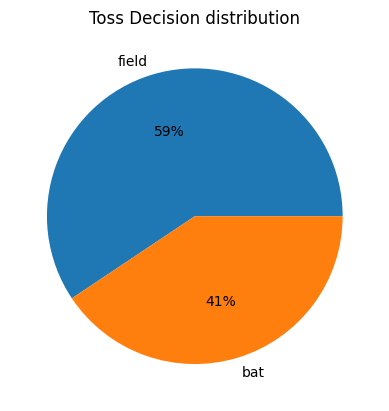

In [47]:
plt.pie(decision,labels=['field','bat'],autopct='%.0f%%')

plt.title('Toss Decision distribution')

This plot show the majority of the teams chooses to elect field after winning the toss and hence team winning toss will be field first

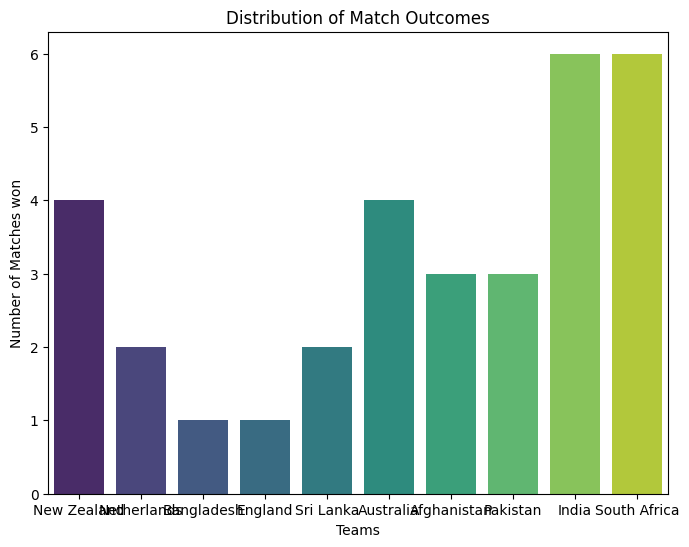

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='winner', data=matches, order=matches['toss_winner'].value_counts().index, palette='viridis')
plt.title('Distribution of Match Outcomes')
plt.ylabel('Number of Matches won')
plt.xlabel('Teams')
plt.show()

This graph show the that team who have won the winning tosses has not led a team to win the match

In [52]:
matches.drop(['season','date', 'match_number','player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type','city','venue'],axis=1,inplace=True)



In [54]:
matches.head(5)

,team1,team2,toss_winner,toss_decision
0,England,New Zealand,New Zealand,field
1,Pakistan,Netherlands,Netherlands,field
2,Afghanistan,Bangladesh,Bangladesh,field
3,South Africa,Sri Lanka,Sri Lanka,field
4,Australia,India,Australia,bat


Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoding=LabelEncoder()


for column in matches.columns:
    matches[column] = encoding.fit_transform(matches[column])


matches

,team1,team2,toss_winner,toss_decision
0,3,6,6,1
1,7,5,5,1
2,0,2,2,1
3,8,9,9,1
4,1,4,1,0
5,6,5,5,1
6,3,2,2,1
7,9,7,9,0
8,0,4,0,0
9,8,1,1,1


Model Training and predicting output

In [60]:
X=matches.drop('toss_decision',axis='columns')
y=matches['toss_decision']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [64]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.5714285714285714
Precision: 0.75
Recall: 0.625


In [66]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [73]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.5714285714285714
Precision: 0.2857142857142857
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we found out that SVC is the best classifier for the toss decision prediction